This Jupyter Notebook took as reference the article : https://towardsdatascience.com/convolutional-neural-networks-explained-how-to-successfully-classify-images-in-python-df829d4ba761

# Index   

1 -> check initial images and amend formats

2 -> wep scrapping of new images for each sport

3 -> validate new images: content, size

4 -> crop training images to 3 squared images

5 -> generation of arrays with images at the proper size and lists with labelling (testing/validation array included) 

6 ->  Create different Convolutional Neural Network/CNN: the simple one, with augmented images, adding an initial pertained model. 

7- > Training and validation 
save models

8 -> Prediction with the best CNN

# Importing libraries

In [116]:
# Tensorflow / Keras
import tensorflow as tf # used to access argmax function
from tensorflow import keras # for building Neural Networks
print('Tensorflow/Keras: %s' % keras.__version__) # print version
from keras.models import Sequential # for creating a linear stack of layers for our Neural Network
from keras import Input # for instantiating a keras tensor
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, MaxPooling2D, AveragePooling2D # for adding Concolutional and densely-connected NN layers.
from keras.preprocessing.image import ImageDataGenerator  
from tensorflow.keras.applications import vgg16, inception_v3, resnet50, mobilenet #import pretrained CNN
from tensorflow.keras import applications 
from keras.models import model_from_json #

from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, RMSprop

# Data manipulation
import pandas as pd # for data manipulation
print('pandas: %s' % pd.__version__) # print version
import numpy as np # for data manipulation
print('numpy: %s' % np.__version__) # print version
import pathlib

# Sklearn
import sklearn # for model evaluation
print('sklearn: %s' % sklearn.__version__) # print version
from sklearn.model_selection import train_test_split # for splitting the data into train and test samples
from sklearn.metrics import classification_report, confusion_matrix # for model evaluation metrics
from sklearn.preprocessing import OrdinalEncoder # for encoding labels


# Visualization
import matplotlib.image as mpimg
import cv2 # for ingesting images
print('OpenCV: %s' % cv2.__version__) # print version
import matplotlib 
import matplotlib.pyplot as plt # for showing images
print('matplotlib: %s' % matplotlib.__version__) # print version
from PIL import Image
import random
import seaborn as sns
sns.set_style('white')

# Other utilities
import sys
import os
from platform import python_version
import time
import datetime


print('python version: %s' % python_version()) # print version


Tensorflow/Keras: 2.9.0
pandas: 1.4.2
numpy: 1.22.3
sklearn: 1.1.1
OpenCV: 4.6.0
matplotlib: 3.5.2
python version: 3.9.13


# Load, Transform and Explore (LTE) data (Images & Labels)

In [2]:
# Assign main directory to a variable
main_dir=os.path.dirname(sys.path[0])
train_images_dir = main_dir +'\\imag_recognition\\train'
test_images_dir = main_dir +'\\imag_recognition\\test'

In [3]:
# Folder structure for this project:
    
# C:\\Users\\march\\000 Treball Ju`yter 000\\Hackathons\\
# |--Image_sports_classification (folder)
# |--|--Imágenes-data-science-ii (folder)
# |--|--|--train (folder)
# |--|--|--|--baseball (folder)
# |--|--|--|--|--image_1.jpg
# |--|--|--|--|--image_2.jpg
# |--|--|--|--|--...
# |--|--|--|--cricket (folder)
# |--|--|--|--|--image_1.jpg
# |--|--|--|--|--image_2.jpg
# |--|--|--|--football (folder)
# |--|--|--|--|--image_1.jpg
# |--|--|--|--|--image_2.jpg
# |--|--|--|--|--...
# |--|--|--test (folder)
# |--|--|--|--image_1.jpg
# |--|--|--|--image_2.jpg
# |--|--|--output (folder) 

In [4]:
def non_jpg_files(folder_path):
    '''returns a list with the names of files that are non .jpg images.
            INPUT: path to be checked
            OUTPUT: list of images that are not .jpg'''
    list_no_jpg=[]
    new_list_files= os.listdir(folder_path)
    for i in range(0, len(new_list_files)):
        if new_list_files[i].split('.')[1] !='jpg':
            list_no_jpg.append (new_list_files[i])
    return list_no_jpg

def jpg_files(folder_path):
    '''returns a list with the names of files that are .jpg images.
            INPUT: path to be checked
            OUTPUT: list of images that are not .jpg'''
    list_jpg=[]
    new_list_files= os.listdir(folder_path)
    for i in range(0, len(new_list_files)):
        if new_list_files[i].split('.')[1] =='jpg':
            list_jpg.append (new_list_files[i])
    return list_jpg

In [5]:
def check_format_images(path):
    non_jpg_images = non_jpg_files (path)
    jpg_images= jpg_files (path)
    print (f'In the folder \n {path} \n there are {len(os.listdir(path))} files: {len(jpg_images)} .jpg images and {len(non_jpg_images)} non jpg images. \n')

In [6]:
for i in os.listdir(train_images_dir):
       path = (os.path.join(train_images_dir, i))
       check_format_images(path)


In the folder 
 c:\Users\march\000 Treball Ju`yter 000\Hackathons\imag_recognition\train\baseball 
 there are 59 files: 59 .jpg images and 0 non jpg images. 

In the folder 
 c:\Users\march\000 Treball Ju`yter 000\Hackathons\imag_recognition\train\cricket 
 there are 72 files: 72 .jpg images and 0 non jpg images. 

In the folder 
 c:\Users\march\000 Treball Ju`yter 000\Hackathons\imag_recognition\train\football 
 there are 51 files: 51 .jpg images and 0 non jpg images. 



In [7]:
check_format_images(test_images_dir)

In the folder 
 c:\Users\march\000 Treball Ju`yter 000\Hackathons\imag_recognition\test 
 there are 41 files: 35 .jpg images and 6 non jpg images. 



An initial analysis of images showed that there are images of different formats in the train and test folders. To proper funtion, let's change the format of images to the same format (jpg) and also check if all images can be accessed by Python.  To do so, diferent functions are created:

In [8]:
def to_jpg_converter(folder_path, image_name):
    '''convert images to the jpg format (remove initial format!!)
        INPUT:  path where the image is and the name of the image 
        OUTPUT: save image in the same directory and delete image with the original format''' 
    path_file = os.path.join(folder_path, image_name) 
    try: 
        im = Image.open(path_file)
        new_name= image_name.split('.')[0] +'.jpg'
        image_new_format = os.path.join(folder_path, new_name)
        im.save(image_new_format)
        im.close()
    except: 
        print (f'image {image_name} could not be transformed' )
    remove_file (folder_path, image_name) 

In [9]:
def remove_file (folder_path, name_file):
    ''' remove file if exists. Else, it shows a warning message
            INPUT: path where the file is and name of the file with extension (.doc, .rmd, .jpg, ....)
            OUTPUT: warning message in case any error on name or path or deleting the file if all is fine
            
            path ha d'estar amb el format correcte!!
        '''
    # Path
    path_file = os.path.join(folder_path, name_file) 
    print (path_file)
    
    # Remove the file
    if os.path.exists(path_file):
        os.remove(path_file)
        print (name_file + ' deleted!!')
    else:
        print ('No file found with such name and route!')

In [10]:
# converting non jpg images to jpg 
for i in ['baseball', 'cricket', 'football']: 
       path = (os.path.join(train_images_dir, i))
       non_jpg_images = non_jpg_files (path)
       for j in non_jpg_images:
                     to_jpg_converter(path, j)            


In [11]:
# Check again the file format of images
for i in os.listdir(train_images_dir):
       path = (os.path.join(train_images_dir, i))
       check_format_images(path)

In the folder 
 c:\Users\march\000 Treball Ju`yter 000\Hackathons\imag_recognition\train\baseball 
 there are 59 files: 59 .jpg images and 0 non jpg images. 

In the folder 
 c:\Users\march\000 Treball Ju`yter 000\Hackathons\imag_recognition\train\cricket 
 there are 72 files: 72 .jpg images and 0 non jpg images. 

In the folder 
 c:\Users\march\000 Treball Ju`yter 000\Hackathons\imag_recognition\train\football 
 there are 51 files: 51 .jpg images and 0 non jpg images. 



In [12]:
# List image categories we are interested in the training set
labels_set = set(os.listdir(train_images_dir))
labels_set

{'baseball', 'cricket', 'football'}

In [13]:
# Create two lists to contain image paths and image labels
ImagePaths=[]
ListLabels=[]
for label in labels_set:
    for image in list(os.listdir(train_images_dir+"/"+label)):
        ImagePaths=ImagePaths+ [train_images_dir+"/"+label+"/"+image]
        ListLabels=ListLabels+[label]

In [14]:
def resize_image (img_path, size):
    ''' Function to resize an image ignoring original aspect ratio:
            INPUT: image full path and new size (n) to  be applied as squared n x n dimensions
            OUTPUT: image of n x n dimesions or message of error if it can not open the image'''
    
    if cv2.haveImageReader(img_path): #check if opencv can read the image
        image = cv2.imread(img_path)
        image = cv2.resize(image, (size, size))
        return image
    else:
        print ('It was not able to open the image. Possible causes: incorrect route, synthaxis, missing permissions,...')


In [15]:
def check_shape_img(img_path):
    if cv2.haveImageReader(img_path): #check if opencv can read the image
        image = cv2.imread(img_path)
        rows, cols, _ = image.shape
        if rows > 2*cols or cols> 2*rows:
            print (path,'\n Image ratio far from squared!! ', )
        return rows, cols
    else:
        print (f'It was not able to open the image. \n {img_path} \n Possible causes: incorrect route, synthaxis, missing permissions,...')

In [16]:
 for image in list(os.listdir(test_images_dir)):
              path = (os.path.join(test_images_dir, image))
              check_shape_img(path)


c:\Users\march\000 Treball Ju`yter 000\Hackathons\imag_recognition\test\f2eeea85-9966-4f34-9769-7ef126490e3c.jpg 
 Image ratio far from squared!! 


In [17]:
for i in os.listdir(train_images_dir):
       for image in list(os.listdir(train_images_dir+"\\"+i)):
              path = (os.path.join(train_images_dir, i,image))
              check_shape_img(path)


c:\Users\march\000 Treball Ju`yter 000\Hackathons\imag_recognition\train\baseball\a67bb61e-95b8-49f1-bbc9-900897a50424.jpg 
 Image ratio far from squared!! 


In [18]:
image_trial = cv2.imread('c:\\Users\\march\\000 Treball Ju`yter 000\\Hackathons\\imag_recognition\\train\\baseball\\a67bb61e-95b8-49f1-bbc9-900897a50424.jpg')
image_trial.shape

(187, 400, 3)

In [19]:
image_trial = cv2.imread('c:\\Users\\march\\000 Treball Ju`yter 000\\Hackathons\\imag_recognition\\test\\f2eeea85-9966-4f34-9769-7ef126490e3c.jpg') 
image_trial.shape

(199, 400, 3)

In [20]:
def crop_image_to_squares(img_path):
    '''Function to crop images to squared images without changing aspect ratio.
            INPUT: image paht
            OUTPUT: error message if it's not possible to open the image or 3 squared imageds that joined include the full image.
            
            *: Previously should be checked that diference between lenght and with are not too big: width/height < (1/3) or width/height >3'''
    if cv2.haveImageReader(img_path): #check if opencv can read the image
        image = cv2.imread(img_path)
        rows, cols, _ = image.shape
        if rows > cols:
            image_cut1 = image [0 : cols , 0 : cols,:]
            image_cut2 = image [(rows-cols) : rows , 0 : cols,:] 
            image_cut3 = image [int((rows-cols)/2) : int((rows+cols)/2) , 0 : cols,:] 

        elif cols > rows:
            image_cut1 = image [0 : rows , 0 : rows,:]
            image_cut2 = image [0 : rows, (cols-rows) : cols,:]
            image_cut3 = image [0 : rows , int((cols-rows)/2) : int((cols+rows)/2),:] 
        else:
            image_cut1 = image_cut2 = image_cut3 = image


        return image_cut1, image_cut2, image_cut3
    else:
        print ('It was not able to open the image. Possible causes: incorrect route, synthaxis, missing permissions,...')

Let's check how it works:

In [21]:
dir_image = train_images_dir+"\\baseball\\0e564fd2-9c18-4010-8a62-445bd899faf0.jpg"
img_sub1, img_sub2, img_sub3 = crop_image_to_squares(dir_image)

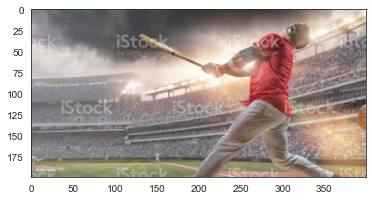

In [22]:
image_1= mpimg.imread(train_images_dir+"\\baseball\\0e564fd2-9c18-4010-8a62-445bd899faf0.jpg")
plt.imshow(image_1)


Initial image 



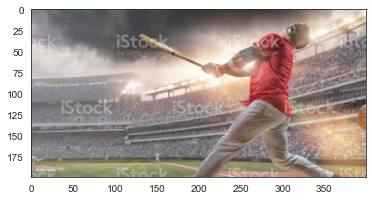

Cropped images


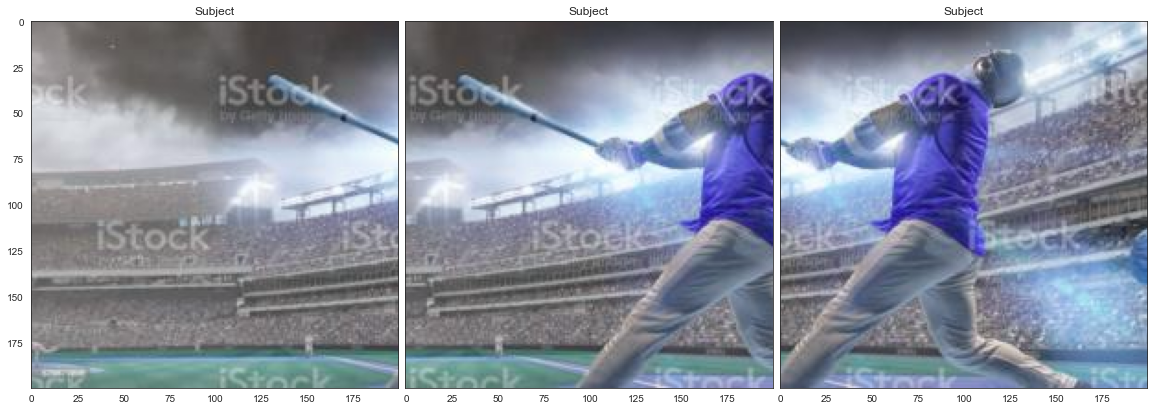

In [23]:
print ('Initial image \n')

image_1= mpimg.imread(train_images_dir+"\\baseball\\0e564fd2-9c18-4010-8a62-445bd899faf0.jpg")
plt.imshow(image_1)
plt.show()

print ('Cropped images')



from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(figsize=(20., 80.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(1, 3),  # creates 1x3 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, [img_sub1, img_sub3, img_sub2]):
    # Iterating over the grid returns the Axes.    
    ax.set_title('Subject')
    ax.imshow(im)

plt.show()


## Array Generation

In [24]:
# Generate an array of images resized to be 224x224 pixels, ignoring original aspect ratio
data_224=[]
for img in ImagePaths:
    image = resize_image(img, 224)
    data_224.append(image)
    
# Convert image data to numpy array and standardize values (divide by 255 since RGB values ranges from 0 to 255)
data_224 = np.array(data_224, dtype="float") / 255.0

# Show data shape
print("Shape of whole data: ", data_224.shape)

Shape of whole data:  (182, 224, 224, 3)


In [25]:
      
# Generate an array of images  resized to be 128x128 pixels, ignoring original aspect ratio

data_128=[]
for img in ImagePaths:
    image = resize_image(img, 128)
    data_128.append(image)
    
# Convert image data to numpy array and standardize values (divide by 255 since RGB values ranges from 0 to 255)
data_128 = np.array(data_128, dtype="float") / 255.0

# Show data shape
print("Shape of whole data: ", data_128.shape)


Shape of whole data:  (182, 128, 128, 3)


In [26]:
# Convert Labels list to numpy array
LabelsArray=np.array(ListLabels)

# Encode labels 
enc = OrdinalEncoder()
y=enc.fit_transform(LabelsArray.reshape(-1,1))


In [27]:
# Create two lists to contain image paths and image labels from the testing images
ImagePaths2=[]
ListLabels2=[]
for label in labels_set:
    img_dir = 'C:\\Users\\march\\000 Treball Ju`yter 000\\Hackathons\\imag_recognition\\test2'+'\\'+label
    for image in list(os.listdir(img_dir)):
        ImagePaths2=ImagePaths2+ [img_dir+"\\"+image]
        ListLabels2=ListLabels2+[label]

In [28]:
# Generate an array of images from test/validation resized to be 224x224 pixels, ignoring original aspect ratio
data_t_224=[]
for img in ImagePaths2:
    image = resize_image(img, 224)
    data_t_224.append(image)
    
# Convert image data to numpy array and standardize values (divide by 255 since RGB values ranges from 0 to 255)
data_t_224 = np.array(data_t_224, dtype="float") / 255.0

# Convert Labels list to numpy array
LabelsArray2=np.array(ListLabels2)

# Encode labels 
enc = OrdinalEncoder()
y_test2=enc.fit_transform(LabelsArray2.reshape(-1,1))



In [29]:
np.unique(y)

array([0., 1., 2.])

In [30]:
# ---- Create training and testing samples ---
X_train, X_test, y_train, y_test = train_test_split(data_224, y, test_size=0.2, random_state=0)
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)

# Print shapes
# Note, model input must have a four-dimensional shape [samples, rows, columns, channels]
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (145, 224, 224, 3)
Shape of y_train:  (145, 1)
Shape of X_test:  (37, 224, 224, 3)
Shape of y_test:  (37, 1)


In [31]:
# ---- Create Alternative training and testing samples: use test samples as validation/test ---
X_train2 = data_224
y_train2 = y
X_test2 =  data_t_224

 

y_train2=y_train2.reshape(-1,1)
y_test2=y_test2.reshape(-1,1)

# Print shapes
# Note, model input must have a four-dimensional shape [samples, rows, columns, channels]
print("Shape of X_train2: ", X_train2.shape)
print("Shape of y_train2: ", y_train2.shape)
print("Shape of X_test2: ", X_test2.shape)
print("Shape of y_test2: ", y_test2.shape)

Shape of X_train2:  (182, 224, 224, 3)
Shape of y_train2:  (182, 1)
Shape of X_test2:  (41, 224, 224, 3)
Shape of y_test2:  (41, 1)


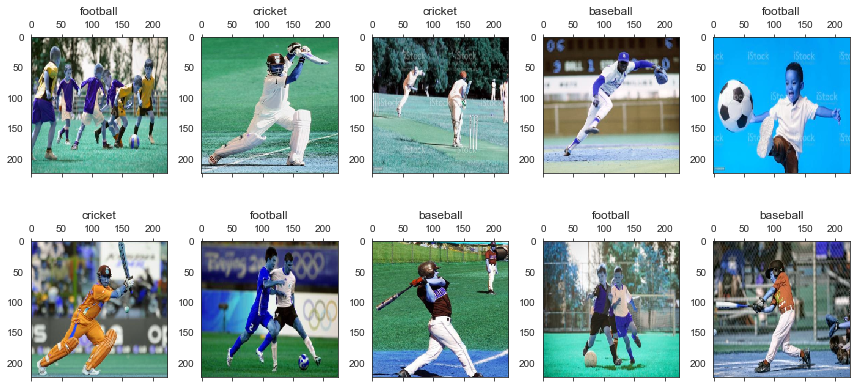

In [32]:
# Display images of 10 sports in the training set and their true labels
fig, axs = plt.subplots(2, 5, sharey=False, tight_layout=True, figsize=(12,6), facecolor='white')
for i in range(0,2):
    for j in range(0,5):
        n= random.randint(0,X_train2.shape[0]-1) #eleccion imagen aleatoria
        axs[i,j].matshow(X_train2[n])
        axs[i,j].set(title=enc.inverse_transform(y_train2)[n][0])
plt.show() 

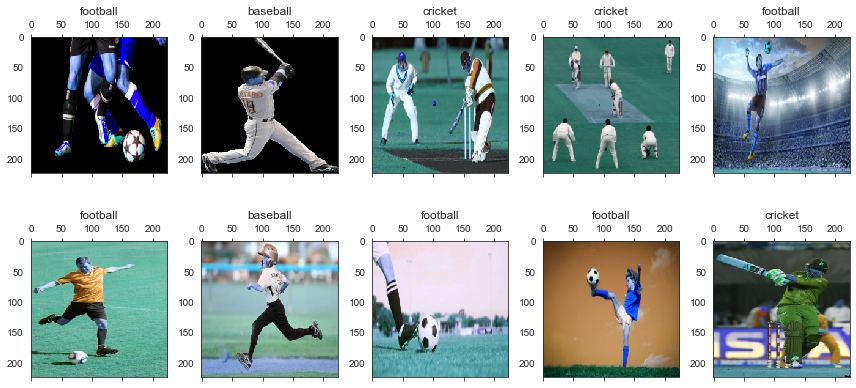

In [45]:
# Display images of 10 sports in the testing/validation set and their true labels
fig, axs = plt.subplots(2, 5, sharey=False, tight_layout=True, figsize=(12,6), facecolor='white')
for i in range(0,2):
    for j in range(0,5):
        n= random.randint(0,X_test2.shape[0]-1) #eleccion imagen aleatoria
        axs[i,j].matshow(X_test2[n])
        axs[i,j].set(title=enc.inverse_transform(y_test2)[n][0])
        #n=n+1
plt.show() 

# Building the neuronal network

## Commom for all models

### Callbacks


In [46]:
#Callbacks structure for all tested models 
class ASK(keras.callbacks.Callback):
    def __init__ (self, model, epochs,  ask_epoch): # initialization of the callback
        super(ASK, self).__init__()
        self.model=model               
        self.ask_epoch=ask_epoch
        self.epochs=epochs
        self.ask=True # if True query the user on a specified epoch
        
    def on_train_begin(self, logs=None): # this runs on the beginning of training
        if self.ask_epoch == 0: 
            print('you set ask_epoch = 0, ask_epoch will be set to 1', flush=True)
            self.ask_epoch=1
        if self.ask_epoch >= self.epochs: # you are running for epochs but ask_epoch>epochs
            print('ask_epoch >= epochs, will train for ', epochs, ' epochs', flush=True)
            self.ask=False # do not query the user
        if self.epochs == 1:
            self.ask=False # running only for 1 epoch so do not query user
        else:
            print('Training will proceed until epoch', ask_epoch,' then you will be asked to') 
            print(' enter H to halt training or enter an integer for how many more epochs to run then be asked again')  
        self.start_time= time.time() # set the time at which training started
        
    def on_train_end(self, logs=None):   # runs at the end of training     
        tr_duration=time.time() - self.start_time   # determine how long the training cycle lasted         
        hours = tr_duration // 3600
        minutes = (tr_duration - (hours * 3600)) // 60
        seconds = tr_duration - ((hours * 3600) + (minutes * 60))
        msg = f'training elapsed time was {str(hours)} hours, {minutes:4.1f} minutes, {seconds:4.2f} seconds)'
        print (msg, flush=True) # print out training duration time
        
    def on_epoch_end(self, epoch, logs=None):  # method runs on the end of each epoch
        if self.ask: # are the conditions right to query the user?
            if epoch + 1 ==self.ask_epoch: # is this epoch the one for quering the user?
                print('\n Enter H to end training or  an integer for the number of additional epochs to run then ask again')
                ans=input()
                
                if ans == 'H' or ans =='h' or ans == '0': # quit training for these conditions
                    print ('you entered ', ans, ' Training halted on epoch ', epoch+1, ' due to user input\n', flush=True)
                    self.model.stop_training = True # halt training
                else: # user wants to continue training
                    self.ask_epoch += int(ans)
                    if self.ask_epoch > self.epochs:
                        print('\nYou specified maximum epochs of as ', self.epochs, ' cannot train for ', self.ask_epoch, flush =True)
                    else:
                        print ('you entered ', ans, ' Training will continue to epoch ', self.ask_epoch, flush=True)




In [47]:
# Instantiate custom callback and create 2 callbacks to control learning rate and early stop

epochs=40
ask_epoch=10
INIT_LR = 1e-3 #Initial Learning Rate
EPOCHS = 25 #Number of epochs in training
BS = 10 #Training Batch Size


In [48]:

ask=ASK(model, epochs,  ask_epoch) #change name of model to a proper funtion
rlronp=tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=2,verbose=1)
estop=tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=4, verbose=1,restore_best_weights=True)
callbacks=[rlronp, estop, ask]

NameError: name 'model' is not defined


### Plot accuracy and loss

In [107]:
def plot_loss_accur (history_model):
    
    fig, axs = plt.subplots(2, 1, figsize=(15,15))

    axs[0].plot(history_model.history['loss'])
    axs[0].plot(history_model.history['val_loss'])
    axs[0].title.set_text('Training Loss vs Validation Loss')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('Loss')
    axs[0].legend(['Train','Val'])

    axs[1].plot(history_model.history['acc'])
    axs[1].plot(history_model.history['val_acc'])
    axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('Accuracy')
    axs[1].legend(['Train', 'Val'])
    

### Save and Load Models

In [72]:
# SAVE
# to serialize the modelo to JSON (model = trained and compiled model)
def save_model (model_X, name_model):
    ''' Function to save trained neuronal network with wheghts:
            INPUT: model and model name as string
            OUTPUT: after saving two files in the working directory it prints an success message. 
            HIGHLIGHTS: saving folder configured inside the function, change if required for other projects!
            '''
    saving_directory = 'C:\\Users\\march\\Downloads\\CNN models' # Models not saved in the Githhub repository because file are too big.
    localtime = datetime.datetime.now()
    time = localtime.strftime("_%Y_%m_%d_%H_%M")
    
    model_name = name_model + time
    model_name_json = model_name + '.json'
    model_name_json = saving_directory + '\\' + model_name_json 
    model_name_h5 = model_name + '.h5'
    model_name_h5 = saving_directory + '\\' + model_name_h5
    
    model_json = model_X.to_json()
    with open(model_name_json, "w") as json_file:
        json_file.write(model_json)
    #to serialize the weights for HDF5
    model_X.save_weights(model_name_h5)
    print("Model saved. Date: ", time )

In [60]:
# LOAD / RECOVER
# to load the json file and load the model with weights

def load_model_and_weights(model_name):
    ''' Function to load saved models of neuronal network with wheghts (files should be in the working directori)
            INPUT: model name as string
            OUTPUT: return the model with the weights and print message if all is all right or something when wrong.
            HIGHLIGHTS: saving folder configured inside the function, change if required for other projects! 
            '''
    saving_directory = 'C:\\Users\\march\\Downloads\\CNN models' # Models not saved in the Githhub repository because file are too big.
    file_json = model_name+ '.json'
    file_json = saving_directory + '\\' + file_json
    file_h5 = model_name+ '.h5'
    file_h5 = saving_directory + '\\' + file_h5

    try:
        json_file = open('model.json', 'r')
        loaded_model_json = json_file.read()
        json_file.close()
        loaded_model = model_from_json(loaded_model_json) # se cargan los pesos (weights) en el nuevo modelo
        loaded_model.load_weights("model.h5") # se cargan los pesos (weights) en el nuevo modelo
        print("Modelo cargado desde el PC") 
        return loaded_model
    except FileNotFoundError: 
        print (f'It was no possible to charge this model, please check the name and route of files: \n{model_name}.json \n{model_name}.h5')

## Inception Pretrained model

Reference: https://github.com/tejanirla/image_classification/blob/master/transfer_learning.ipynb

In [83]:
pre_trained_model = inception_v3.InceptionV3(input_shape = (224, 224, 3), # Shape of our images
                                include_top = False, # Leave out the last fully connected layer
                                weights = 'imagenet')

In [84]:
for layer in pre_trained_model.layers:
  layer.trainable = False

In [85]:
class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc')>0.995):
            print("\nReached 99.9% accuracy so cancelling training!")
            self.model.stop_training = True

In [86]:
# Flatten the output layer to 1 dimension
x = keras.layers.Flatten()(pre_trained_model.output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = keras.layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = keras.layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = keras.layers.Dense  (3, activation='sigmoid')(x)           

model_inception = Model( pre_trained_model.input, x) 


In [87]:

x = keras.layers.AveragePooling2D(pool_size=(4, 4))(pre_trained_model.output)
# Flatten the output layer to 1 dimension
x = keras.layers.Flatten()(x)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = keras.layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = keras.layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = keras.layers.Dense  (3, activation='sigmoid')(x)           

model_inception2 = Model( pre_trained_model.input, x) 

In [88]:

model_inception.compile(optimizer = RMSprop(learning_rate=0.0001), 
              loss = 'SparseCategoricalCrossentropy', 
              metrics = ['acc'])

In [89]:
callbacks = myCallback()
H_model_inception = model_inception.fit(X_train2, # input data
                y_train2, # target data
                batch_size=32, # Number of samples per gradient update. If unspecified, batch_size will default to 32.
                epochs=40, # default=1, Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided
                verbose=2, # default='auto', ('auto', 0, 1, or 2). Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch. 'auto' defaults to 1 for most cases, but 2 when used with ParameterServerStrategy.
                callbacks=[callbacks], # default=None, list of callbacks to apply during training. See tf.keras.callbacks
                validation_split=0, # default=0.0, Fraction of the training data to be used as validation data. The model will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model metrics on this data at the end of each epoch. 
                validation_data=(X_test2, y_test2), # default=None, Data on which to evaluate the loss and any model metrics at the end of each epoch. 
                shuffle=True, # default=True, Boolean (whether to shuffle the training data before each epoch) or str (for 'batch').
                class_weight=None, # default=None, Optional dictionary mapping class indices (integers) to a weight (float) value, used for weighting the loss function (during training only). This can be useful to tell the model to "pay more attention" to samples from an under-represented class.
                sample_weight=None, # default=None, Optional Numpy array of weights for the training samples, used for weighting the loss function (during training only).
                initial_epoch=0, # Integer, default=0, Epoch at which to start training (useful for resuming a previous training run).
                steps_per_epoch=None, # Integer or None, default=None, Total number of steps (batches of samples) before declaring one epoch finished and starting the next epoch. When training with input tensors such as TensorFlow data tensors, the default None is equal to the number of samples in your dataset divided by the batch size, or 1 if that cannot be determined. 
                validation_steps=None, # Only relevant if validation_data is provided and is a tf.data dataset. Total number of steps (batches of samples) to draw before stopping when performing validation at the end of every epoch.
                validation_batch_size=None, # Integer or None, default=None, Number of samples per validation batch. If unspecified, will default to batch_size.
                validation_freq=1, # default=1, Only relevant if validation data is provided. If an integer, specifies how many training epochs to run before a new validation run is performed, e.g. validation_freq=2 runs validation every 2 epochs.
                max_queue_size=10, # default=10, Used for generator or keras.utils.Sequence input only. Maximum size for the generator queue. If unspecified, max_queue_size will default to 10.
                workers=1, # default=1, Used for generator or keras.utils.Sequence input only. Maximum number of processes to spin up when using process-based threading. If unspecified, workers will default to 1.
                use_multiprocessing=False, # default=False, Used for generator or keras.utils.Sequence input only. If True, use process-based threading. If unspecified, use_multiprocessing will default to False. 
                )

Epoch 1/40
6/6 - 46s - loss: 19.9995 - acc: 0.4780 - val_loss: 0.9535 - val_acc: 0.7073 - 46s/epoch - 8s/step
Epoch 2/40
6/6 - 30s - loss: 2.0243 - acc: 0.7363 - val_loss: 1.8793 - val_acc: 0.6098 - 30s/epoch - 5s/step
Epoch 3/40
6/6 - 30s - loss: 1.7517 - acc: 0.7198 - val_loss: 1.5100 - val_acc: 0.6829 - 30s/epoch - 5s/step
Epoch 4/40
6/6 - 30s - loss: 0.1125 - acc: 0.9670 - val_loss: 1.1519 - val_acc: 0.7073 - 30s/epoch - 5s/step
Epoch 5/40

Reached 99.9% accuracy so cancelling training!
6/6 - 28s - loss: 0.0161 - acc: 1.0000 - val_loss: 1.1971 - val_acc: 0.6829 - 28s/epoch - 5s/step


In [90]:
save_model (model_inception, 'Inception_m1_initial')

Model saved. Date:  _2022_09_09_13_59


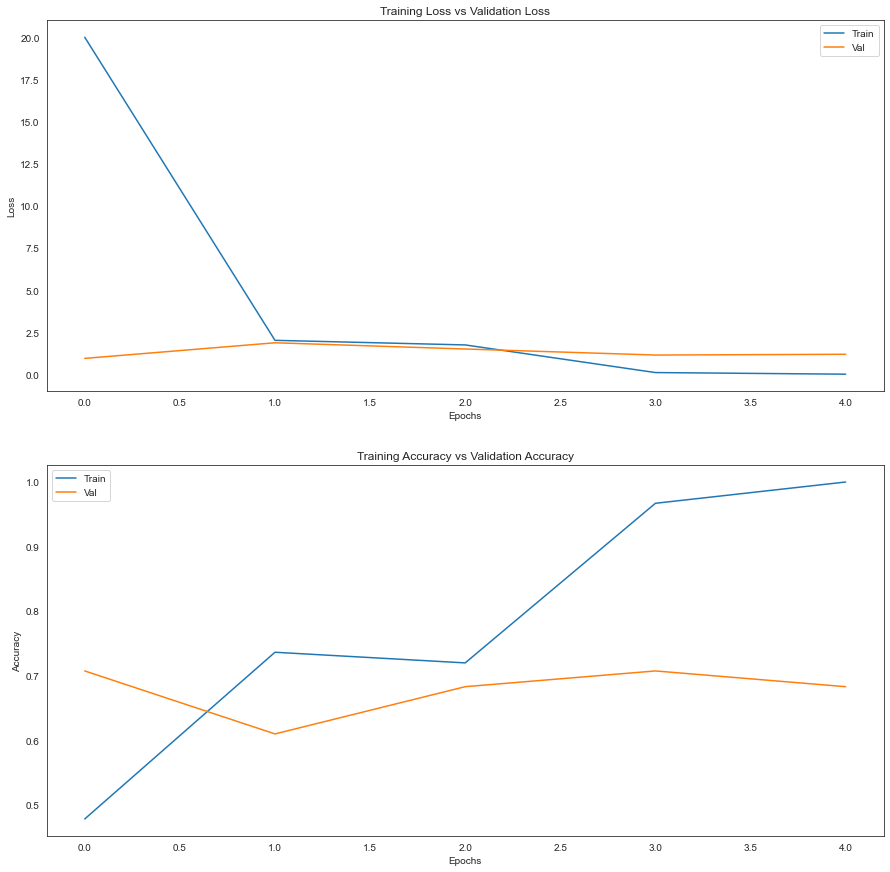

In [113]:
plot_loss_accur (H_model_inception)

In [91]:
# Instantiate custom callback and create 2 callbacks to control learning rate and early stop

epochs=40
ask_epoch=10
INIT_LR = 1e-3 #Initial Learning Rate
EPOCHS = 25 #Number of epochs in training
BS = 10 #Training Batch Size

opt = Adam(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS)
model_inception2.compile(optimizer = opt, 
            loss = 'SparseCategoricalCrossentropy', 
            metrics = ['acc'])

In [92]:
callbacks = myCallback()
H_model_inception2 = model_inception2.fit(X_train2, # input data
                y_train2, # target data
                batch_size=32, # Number of samples per gradient update. If unspecified, batch_size will default to 32.
                epochs=epochs
                , # default=1, Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided
                verbose=2, # default='auto', ('auto', 0, 1, or 2). Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch. 'auto' defaults to 1 for most cases, but 2 when used with ParameterServerStrategy.
                callbacks=[callbacks], # default=None, list of callbacks to apply during training. See tf.keras.callbacks
                validation_split=0, # default=0.0, Fraction of the training data to be used as validation data. The model will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model metrics on this data at the end of each epoch. 
                validation_data=(X_test2, y_test2), # default=None, Data on which to evaluate the loss and any model metrics at the end of each epoch. 
                shuffle=True, # default=True, Boolean (whether to shuffle the training data before each epoch) or str (for 'batch').
                class_weight=None, # default=None, Optional dictionary mapping class indices (integers) to a weight (float) value, used for weighting the loss function (during training only). This can be useful to tell the model to "pay more attention" to samples from an under-represented class.
                sample_weight=None, # default=None, Optional Numpy array of weights for the training samples, used for weighting the loss function (during training only).
                initial_epoch=0, # Integer, default=0, Epoch at which to start training (useful for resuming a previous training run).
                steps_per_epoch=None, # Integer or None, default=None, Total number of steps (batches of samples) before declaring one epoch finished and starting the next epoch. When training with input tensors such as TensorFlow data tensors, the default None is equal to the number of samples in your dataset divided by the batch size, or 1 if that cannot be determined. 
                validation_steps=None, # Only relevant if validation_data is provided and is a tf.data dataset. Total number of steps (batches of samples) to draw before stopping when performing validation at the end of every epoch.
                validation_batch_size=None, # Integer or None, default=None, Number of samples per validation batch. If unspecified, will default to batch_size.
                validation_freq=1, # default=1, Only relevant if validation data is provided. If an integer, specifies how many training epochs to run before a new validation run is performed, e.g. validation_freq=2 runs validation every 2 epochs.
                max_queue_size=10, # default=10, Used for generator or keras.utils.Sequence input only. Maximum size for the generator queue. If unspecified, max_queue_size will default to 10.
                workers=1, # default=1, Used for generator or keras.utils.Sequence input only. Maximum number of processes to spin up when using process-based threading. If unspecified, workers will default to 1.
                use_multiprocessing=False, # default=False, Used for generator or keras.utils.Sequence input only. If True, use process-based threading. If unspecified, use_multiprocessing will default to False. 
                )

Epoch 1/40
6/6 - 29s - loss: 5.9083 - acc: 0.4066 - val_loss: 2.4652 - val_acc: 0.4878 - 29s/epoch - 5s/step
Epoch 2/40
6/6 - 24s - loss: 1.7743 - acc: 0.5000 - val_loss: 1.2423 - val_acc: 0.5366 - 24s/epoch - 4s/step
Epoch 3/40
6/6 - 29s - loss: 1.0776 - acc: 0.6374 - val_loss: 1.1685 - val_acc: 0.6098 - 29s/epoch - 5s/step
Epoch 4/40
6/6 - 31s - loss: 0.5888 - acc: 0.7967 - val_loss: 0.8810 - val_acc: 0.6585 - 31s/epoch - 5s/step
Epoch 5/40
6/6 - 29s - loss: 0.3737 - acc: 0.8407 - val_loss: 0.8192 - val_acc: 0.6829 - 29s/epoch - 5s/step
Epoch 6/40
6/6 - 34s - loss: 0.3708 - acc: 0.8736 - val_loss: 0.7907 - val_acc: 0.7073 - 34s/epoch - 6s/step
Epoch 7/40
6/6 - 28s - loss: 0.1949 - acc: 0.9505 - val_loss: 0.6193 - val_acc: 0.7561 - 28s/epoch - 5s/step
Epoch 8/40
6/6 - 30s - loss: 0.1831 - acc: 0.9505 - val_loss: 0.6324 - val_acc: 0.7073 - 30s/epoch - 5s/step
Epoch 9/40
6/6 - 31s - loss: 0.1389 - acc: 0.9670 - val_loss: 0.7109 - val_acc: 0.7317 - 31s/epoch - 5s/step
Epoch 10/40
6/6 - 2

In [112]:
save_model (model_inception2, 'Inception_m2_initial')

Model saved. Date:  _2022_09_09_16_48


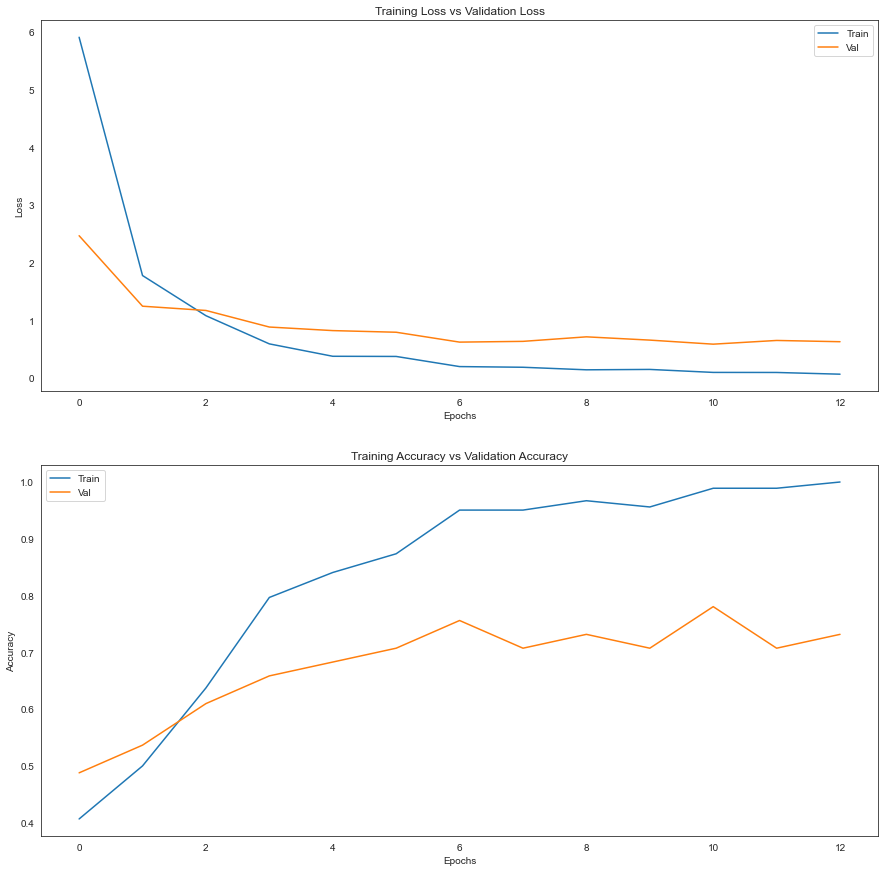

In [111]:
plot_loss_accur (H_model_inception2)

### Augmented Images

In [94]:
train_dir = 'C:\\Users\\march\\000 Treball Ju`yter 000\\Hackathons\\Image_sports_classification\\Imágenes-data-science-ii\\train'
validation_dir = 'C:\\Users\\march\\000 Treball Ju`yter 000\\Hackathons\\Image_sports_classification\\Imágenes-data-science-ii\\validation'
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale = 1.0/255. )  

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = 'binary', 
                                                    target_size = (224, 224))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( validation_dir,
                                                          batch_size  = 20,
                                                          class_mode  = 'binary', 
                                                          target_size = (224, 224))

Found 210 images belonging to 3 classes.
Found 41 images belonging to 3 classes.


In [95]:
# Instantiate custom callback and create 2 callbacks to control learning rate and early stop

epochs=40
ask_epoch=10
INIT_LR = 1e-3 #Initial Learning Rate
EPOCHS = 25 #Number of epochs in training
BS = 10 #Training Batch Size

epochs=40
ask_epoch=10
INIT_LR = 1e-3 #Initial Learning Rate
EPOCHS = 25 #Number of epochs in training
BS = 10 #Training Batch Size


#### Model 1

In [96]:

opt = Adam(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS)
model_inception.compile(optimizer = opt, 
              loss = 'SparseCategoricalCrossentropy', 
              metrics = ['acc'])


In [97]:
callbacks = myCallback()
H_model_inception_aug = model_inception.fit(
            train_generator,
            validation_data = validation_generator,
            epochs=40, # default=1, Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided
            verbose=2, # default='auto', ('auto', 0, 1, or 2). Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch. 'auto' defaults to 1 for most cases, but 2 when used with ParameterServerStrategy.
            callbacks=[callbacks], # default=None, list of callbacks to apply during training. See tf.keras.callbacks
            shuffle=True, # default=True, Boolean (whether to shuffle the training data before each epoch) or str (for 'batch').
            initial_epoch=0, # Integer, default=0, Epoch at which to start training (useful for resuming a previous training run).
            steps_per_epoch= 5, # Integer or None, default=None, Total number of steps (batches of samples) before declaring one epoch finished and starting the next epoch. When training with input tensors such as TensorFlow data tensors, the default None is equal to the number of samples in your dataset divided by the batch size, or 1 if that cannot be determined. 
            validation_freq=1, # default=1, Only relevant if validation data is provided. If an integer, specifies how many training epochs to run before a new validation run is performed, e.g. validation_freq=2 runs validation every 2 epochs.
            max_queue_size=10, # default=10, Used for generator or keras.utils.Sequence input only. Maximum size for the generator queue. If unspecified, max_queue_size will default to 10.
            workers=1, # default=1, Used for generator or keras.utils.Sequence input only. Maximum number of processes to spin up when using process-based threading. If unspecified, workers will default to 1.
            use_multiprocessing= False # default=False, Used for generator or keras.utils.Sequence input only. If True, use process-based threading. If unspecified, use_multiprocessing will default to False. 
                )

Epoch 1/40
5/5 - 26s - loss: 24.8711 - acc: 0.4667 - val_loss: 14.7591 - val_acc: 0.5366 - 26s/epoch - 5s/step
Epoch 2/40
5/5 - 15s - loss: 15.5815 - acc: 0.4600 - val_loss: 13.8013 - val_acc: 0.6585 - 15s/epoch - 3s/step
Epoch 3/40
5/5 - 19s - loss: 6.7596 - acc: 0.7000 - val_loss: 4.4282 - val_acc: 0.6585 - 19s/epoch - 4s/step
Epoch 4/40
5/5 - 17s - loss: 5.4102 - acc: 0.7000 - val_loss: 14.8944 - val_acc: 0.6585 - 17s/epoch - 3s/step
Epoch 5/40
5/5 - 15s - loss: 10.5539 - acc: 0.6444 - val_loss: 7.3197 - val_acc: 0.6829 - 15s/epoch - 3s/step
Epoch 6/40
5/5 - 19s - loss: 10.2218 - acc: 0.6667 - val_loss: 7.7332 - val_acc: 0.6098 - 19s/epoch - 4s/step
Epoch 7/40
5/5 - 20s - loss: 10.1356 - acc: 0.5800 - val_loss: 2.6293 - val_acc: 0.8537 - 20s/epoch - 4s/step
Epoch 8/40
5/5 - 25s - loss: 10.6641 - acc: 0.6000 - val_loss: 13.3432 - val_acc: 0.5122 - 25s/epoch - 5s/step
Epoch 9/40
5/5 - 22s - loss: 5.2471 - acc: 0.7222 - val_loss: 2.7749 - val_acc: 0.7317 - 22s/epoch - 4s/step
Epoch 10/

In [98]:
save_model (model_inception, 'Inception_m1_augmented')


Model saved. Date:  _2022_09_09_14_26


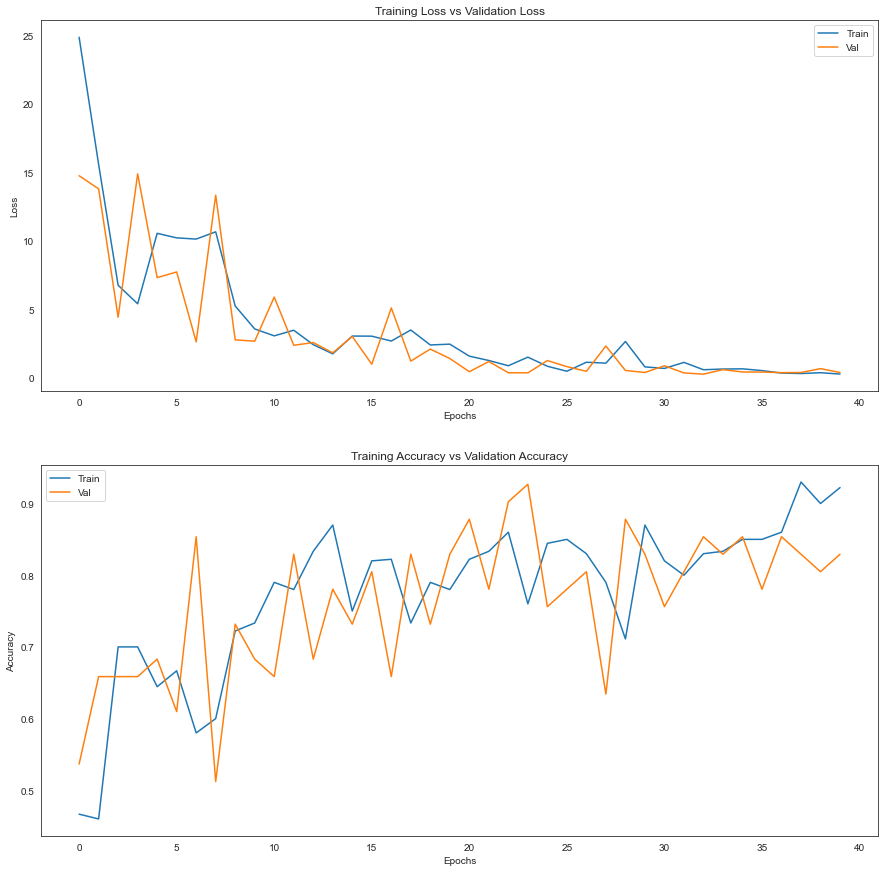

In [109]:
plot_loss_accur (H_model_inception_aug)

#### Model 2

In [99]:
opt = Adam(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS)
model_inception2.compile(optimizer = opt, 
              loss = 'SparseCategoricalCrossentropy', 
              metrics = ['acc'])

In [100]:
callbacks = myCallback()
H_model_inception_aug2 = model_inception2.fit(
            train_generator,
            validation_data = validation_generator,
            epochs=20, # default=1, Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided
            verbose=2, # default='auto', ('auto', 0, 1, or 2). Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch. 'auto' defaults to 1 for most cases, but 2 when used with ParameterServerStrategy.
            callbacks=[callbacks], # default=None, list of callbacks to apply during training. See tf.keras.callbacks
            shuffle=True, # default=True, Boolean (whether to shuffle the training data before each epoch) or str (for 'batch').
            initial_epoch=0, # Integer, default=0, Epoch at which to start training (useful for resuming a previous training run).
            steps_per_epoch= 5, # Integer or None, default=None, Total number of steps (batches of samples) before declaring one epoch finished and starting the next epoch. When training with input tensors such as TensorFlow data tensors, the default None is equal to the number of samples in your dataset divided by the batch size, or 1 if that cannot be determined. 
            validation_freq=1, # default=1, Only relevant if validation data is provided. If an integer, specifies how many training epochs to run before a new validation run is performed, e.g. validation_freq=2 runs validation every 2 epochs.
            max_queue_size=10, # default=10, Used for generator or keras.utils.Sequence input only. Maximum size for the generator queue. If unspecified, max_queue_size will default to 10.
            workers=1, # default=1, Used for generator or keras.utils.Sequence input only. Maximum number of processes to spin up when using process-based threading. If unspecified, workers will default to 1.
            use_multiprocessing= False # default=False, Used for generator or keras.utils.Sequence input only. If True, use process-based threading. If unspecified, use_multiprocessing will default to False. 
                )

Epoch 1/20
5/5 - 30s - loss: 1.1086 - acc: 0.6778 - val_loss: 0.5283 - val_acc: 0.8537 - 30s/epoch - 6s/step
Epoch 2/20
5/5 - 15s - loss: 0.8036 - acc: 0.6333 - val_loss: 0.4755 - val_acc: 0.7317 - 15s/epoch - 3s/step
Epoch 3/20
5/5 - 17s - loss: 0.4931 - acc: 0.7500 - val_loss: 0.3853 - val_acc: 0.8293 - 17s/epoch - 3s/step
Epoch 4/20
5/5 - 18s - loss: 0.4593 - acc: 0.7800 - val_loss: 0.4741 - val_acc: 0.7561 - 18s/epoch - 4s/step
Epoch 5/20
5/5 - 20s - loss: 0.5532 - acc: 0.7200 - val_loss: 0.3680 - val_acc: 0.8293 - 20s/epoch - 4s/step
Epoch 6/20
5/5 - 20s - loss: 0.4002 - acc: 0.8300 - val_loss: 0.3625 - val_acc: 0.8293 - 20s/epoch - 4s/step
Epoch 7/20
5/5 - 18s - loss: 0.5514 - acc: 0.8000 - val_loss: 0.3553 - val_acc: 0.8049 - 18s/epoch - 4s/step
Epoch 8/20
5/5 - 18s - loss: 0.3964 - acc: 0.8300 - val_loss: 0.3441 - val_acc: 0.8049 - 18s/epoch - 4s/step
Epoch 9/20
5/5 - 20s - loss: 0.4621 - acc: 0.8300 - val_loss: 0.3655 - val_acc: 0.7805 - 20s/epoch - 4s/step
Epoch 10/20
5/5 - 2

In [101]:
save_model (model_inception2, 'Inception_m2_augmented')

Model saved. Date:  _2022_09_09_15_06


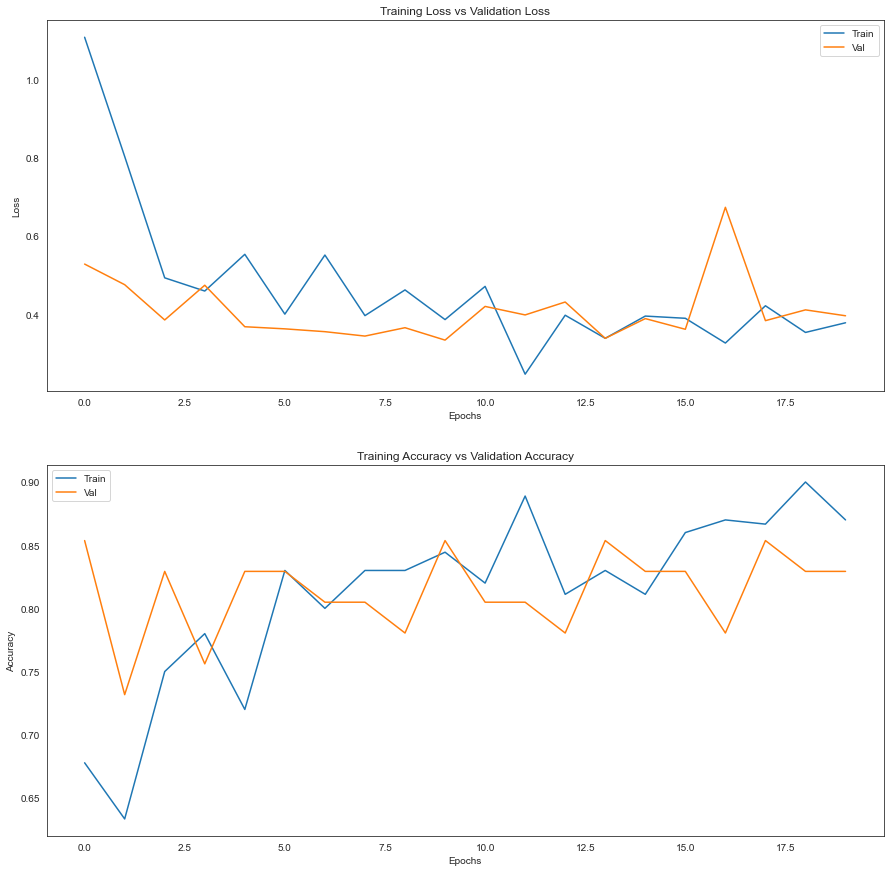

In [110]:
plot_loss_accur (H_model_inception_aug2)

Accuracy for the validation is higher because no data augmentation has been applied to the validation images.The model is trained with images with higher variability and validation images

# MobilenetV2 model

In [57]:
pre_trained_model = tf.keras.applications.MobileNetV3Large(input_shape = (224, 224, 3), # Shape of our images
                                include_top = False, # Leave out the last fully connected layer
                                weights = 'imagenet',
                                classifier_activation="softmax",
                                include_preprocessing=True,)

In [58]:

x = keras.layers.AveragePooling2D(pool_size=(4, 4))(pre_trained_model.output)
# Flatten the output layer to 1 dimension
x = keras.layers.Flatten()(x)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = keras.layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = keras.layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = keras.layers.Dense  (3, activation='sigmoid')(x)           

MobilenetV2_model = Model( pre_trained_model.input, x) 

# model.summary()  # Uncomment this to print a long summary!

In [59]:
for layer in pre_trained_model.layers:
  layer.trainable = True

In [60]:
opt = Adam(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS)
MobilenetV2_model.compile(optimizer = opt, 
              loss = 'SparseCategoricalCrossentropy', 
              metrics = ['acc'])

In [61]:

H_MobilenetV2 = MobilenetV2_model.fit(
            train_generator,
            validation_data = validation_generator,
            epochs=40, # default=1, Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided
            verbose=2, # default='auto', ('auto', 0, 1, or 2). Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch. 'auto' defaults to 1 for most cases, but 2 when used with ParameterServerStrategy.
            callbacks=[callbacks], # default=None, list of callbacks to apply during training. See tf.keras.callbacks
            shuffle=True, # default=True, Boolean (whether to shuffle the training data before each epoch) or str (for 'batch').
            initial_epoch=0, # Integer, default=0, Epoch at which to start training (useful for resuming a previous training run).
            steps_per_epoch= 5, # Integer or None, default=None, Total number of steps (batches of samples) before declaring one epoch finished and starting the next epoch. When training with input tensors such as TensorFlow data tensors, the default None is equal to the number of samples in your dataset divided by the batch size, or 1 if that cannot be determined. 
            validation_freq=1, # default=1, Only relevant if validation data is provided. If an integer, specifies how many training epochs to run before a new validation run is performed, e.g. validation_freq=2 runs validation every 2 epochs.
            max_queue_size=10, # default=10, Used for generator or keras.utils.Sequence input only. Maximum size for the generator queue. If unspecified, max_queue_size will default to 10.
            workers=1, # default=1, Used for generator or keras.utils.Sequence input only. Maximum number of processes to spin up when using process-based threading. If unspecified, workers will default to 1.
            use_multiprocessing= False # default=False, Used for generator or keras.utils.Sequence input only. If True, use process-based threading. If unspecified, use_multiprocessing will default to False. 
                )

Epoch 1/40
5/5 - 27s - loss: 2.1714 - acc: 0.2900 - val_loss: 1.1445 - val_acc: 0.3171 - 27s/epoch - 5s/step
Epoch 2/40
5/5 - 15s - loss: 1.0160 - acc: 0.5444 - val_loss: 1.1555 - val_acc: 0.3415 - 15s/epoch - 3s/step
Epoch 3/40
5/5 - 16s - loss: 0.9369 - acc: 0.5600 - val_loss: 1.2093 - val_acc: 0.3171 - 16s/epoch - 3s/step
Epoch 4/40
5/5 - 17s - loss: 0.6659 - acc: 0.7600 - val_loss: 1.3445 - val_acc: 0.3171 - 17s/epoch - 3s/step
Epoch 5/40
5/5 - 15s - loss: 0.6377 - acc: 0.7556 - val_loss: 1.5334 - val_acc: 0.3171 - 15s/epoch - 3s/step
Epoch 6/40
5/5 - 16s - loss: 0.4832 - acc: 0.8100 - val_loss: 2.0324 - val_acc: 0.3171 - 16s/epoch - 3s/step
Epoch 7/40
5/5 - 16s - loss: 0.3767 - acc: 0.8500 - val_loss: 3.0324 - val_acc: 0.3171 - 16s/epoch - 3s/step
Epoch 8/40
5/5 - 16s - loss: 0.3116 - acc: 0.9000 - val_loss: 3.1693 - val_acc: 0.3171 - 16s/epoch - 3s/step
Epoch 9/40
5/5 - 18s - loss: 0.3703 - acc: 0.8700 - val_loss: 3.5968 - val_acc: 0.3171 - 18s/epoch - 4s/step
Epoch 10/40
5/5 - 1

# Resnet 

In [94]:
base_model = tf.keras.applications.ResNet152(weights = 'imagenet', include_top = False, input_shape = (224,224,3))
for layer in base_model.layers:
  layer.trainable = False

In [95]:


#x = keras.layers.AveragePooling2D(pool_size=(4, 4))(base_model.output)
# Flatten the output layer to 1 dimension
x = keras.layers.Flatten()(base_model.output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = keras.layers.Dense(1200, activation='relu')(x)
# Add a dropout rate of 0.2
x = keras.layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = keras.layers.Dense  (3, activation='sigmoid')(x)           

ResNet152_model = Model( base_model.input, x) 

# model.summary()  # Uncomment this to print a long summary!

In [76]:
opt = Adam(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS)
ResNet152_model.compile(optimizer = opt, 
              loss = 'SparseCategoricalCrossentropy', 
              metrics = ['acc'])

In [96]:
H_ResNet152_model = ResNet152_model.fit(
            train_generator,
            batch_size=64, 
            validation_data = validation_generator,
            epochs=30, # default=1, Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided
            verbose=2, # default='auto', ('auto', 0, 1, or 2). Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch. 'auto' defaults to 1 for most cases, but 2 when used with ParameterServerStrategy.
            callbacks=[callbacks], # default=None, list of callbacks to apply during training. See tf.keras.callbacks
            shuffle=True, # default=True, Boolean (whether to shuffle the training data before each epoch) or str (for 'batch').
            initial_epoch=0, # Integer, default=0, Epoch at which to start training (useful for resuming a previous training run).
            steps_per_epoch= 5, # Integer or None, default=None, Total number of steps (batches of samples) before declaring one epoch finished and starting the next epoch. When training with input tensors such as TensorFlow data tensors, the default None is equal to the number of samples in your dataset divided by the batch size, or 1 if that cannot be determined. 
            validation_freq=1, # default=1, Only relevant if validation data is provided. If an integer, specifies how many training epochs to run before a new validation run is performed, e.g. validation_freq=2 runs validation every 2 epochs.
            max_queue_size=10, # default=10, Used for generator or keras.utils.Sequence input only. Maximum size for the generator queue. If unspecified, max_queue_size will default to 10.
            workers=1, # default=1, Used for generator or keras.utils.Sequence input only. Maximum number of processes to spin up when using process-based threading. If unspecified, workers will default to 1.
            use_multiprocessing= False # default=False, Used for generator or keras.utils.Sequence input only. If True, use process-based threading. If unspecified, use_multiprocessing will default to False. 
                )

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

# Googlenet

In [97]:
def inception(x,
              filters_1x1,
              filters_3x3_reduce,
              filters_3x3,
              filters_5x5_reduce,
              filters_5x5,
              filters_pool):
  path1 = keras.layers.Conv2D(filters_1x1, (1, 1), padding='same',    activation='relu')(x)
  path2 = keras.layers.Conv2D(filters_3x3_reduce, (1, 1), padding='same', activation='relu')(x)
  path2 = keras.layers.Conv2D(filters_3x3, (1, 1), padding='same', activation='relu')(path2)
  path3 = keras.layers.Conv2D(filters_5x5_reduce, (1, 1), padding='same', activation='relu')(x)
  path3 = keras.layers.Conv2D(filters_5x5, (1, 1), padding='same', activation='relu')(path3)
  path4 = keras.layers.MaxPool2D((3, 3), strides=(1, 1), padding='same')(x)
  path4 = keras.layers.Conv2D(filters_pool, (1, 1), padding='same', activation='relu')(path4)
  return tf.concat([path1, path2, path3, path4], axis=3)

In [98]:
inp = keras.layers.Input(shape=(224, 224, 3))
input_tensor = keras.layers.experimental.preprocessing.Resizing(224, 224, interpolation="bilinear")(inp)
x = keras.layers.Conv2D(64, 7, strides=2, padding='same', activation='relu')(input_tensor)
x = keras.layers.MaxPooling2D(3, strides=2)(x)
x = keras.layers.Conv2D(64, 1, strides=1, padding='same', activation='relu')(x)
x = keras.layers.Conv2D(192, 3, strides=1, padding='same', activation='relu')(x)
x = keras.layers.MaxPooling2D(3, strides=2)(x)
x = inception(x, filters_1x1=64, filters_3x3_reduce=96, filters_3x3=128, filters_5x5_reduce=16, filters_5x5=32, filters_pool=32)
x = inception(x, filters_1x1=128, filters_3x3_reduce=128, filters_3x3=192, filters_5x5_reduce=32, filters_5x5=96, filters_pool=64)
x = keras.layers.MaxPooling2D(3, strides=2)(x)
x = inception(x, filters_1x1=192, filters_3x3_reduce=96, filters_3x3=208, filters_5x5_reduce=16, filters_5x5=48, filters_pool=64)
aux1 = keras.layers.AveragePooling2D((5, 5), strides=3)(x)
aux1 =keras.layers.Conv2D(128, 1, padding='same', activation='relu')(aux1)
aux1 = keras.layers.Flatten()(aux1)
aux1 = keras.layers.Dense(1024, activation='relu')(aux1)
aux1 = keras.layers.Dropout(0.7)(aux1)
aux1 = keras.layers.Dense(10, activation='softmax')(aux1)
x = inception(x, filters_1x1=160, filters_3x3_reduce=112, filters_3x3=224, filters_5x5_reduce=24, filters_5x5=64, filters_pool=64)
x = inception(x, filters_1x1=128, filters_3x3_reduce=128, filters_3x3=256, filters_5x5_reduce=24, filters_5x5=64, filters_pool=64)
x = inception(x, filters_1x1=112, filters_3x3_reduce=144, filters_3x3=288, filters_5x5_reduce=32, filters_5x5=64, filters_pool=64)
aux2 = keras.layers.AveragePooling2D((5, 5), strides=3)(x)
aux2 =keras.layers.Conv2D(128, 1, padding='same', activation='relu')(aux2)
aux2 = keras.layers.Flatten()(aux2)
aux2 = keras.layers.Dense(1024, activation='relu')(aux2)
aux2 = keras.layers.Dropout(0.7)(aux2) 
aux2 = keras.layers.Dense(10, activation='softmax')(aux2)
x = inception(x, filters_1x1=256, filters_3x3_reduce=160, filters_3x3=320, filters_5x5_reduce=32, filters_5x5=128, filters_pool=128)
x = keras.layers.MaxPooling2D(3, strides=2)(x)
x = inception(x, filters_1x1=256, filters_3x3_reduce=160, filters_3x3=320, filters_5x5_reduce=32, filters_5x5=128, filters_pool=128)
x = inception(x, filters_1x1=384, filters_3x3_reduce=192, filters_3x3=384, filters_5x5_reduce=48, filters_5x5=128, filters_pool=128)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.4)(x)
out = keras.layers.Dense(3, activation='softmax')(x)

model_Googlenet = Model(inputs = inp, outputs = [out, aux1, aux2])

In [99]:

model_Googlenet.compile(optimizer='adam', 
              loss=['SparseCategoricalCrossentropy',
                    'SparseCategoricalCrossentropy',
                    'SparseCategoricalCrossentropy'],
              loss_weights=[1, 0.3, 0.3],
              metrics=['accuracy'])

In [100]:
H_model_Googlenet  = model_Googlenet .fit(X_train2, [y_train2, y_train2, y_train2], 
                    validation_data=(X_test2, [y_test2, y_test2, y_test2]), 
                    batch_size=64, 
                    epochs=40,
                    verbose = 2)

Epoch 1/40
3/3 - 58s - loss: 2.3551 - dense_38_loss: 1.0931 - dense_35_loss: 2.1221 - dense_37_loss: 2.0846 - dense_38_accuracy: 0.3681 - dense_35_accuracy: 0.2637 - dense_37_accuracy: 0.2637 - val_loss: 1.9522 - val_dense_38_loss: 1.2343 - val_dense_35_loss: 1.2122 - val_dense_37_loss: 1.1809 - val_dense_38_accuracy: 0.3659 - val_dense_35_accuracy: 0.3659 - val_dense_37_accuracy: 0.3659 - 58s/epoch - 19s/step
Epoch 2/40
3/3 - 29s - loss: 1.8597 - dense_38_loss: 1.1226 - dense_35_loss: 1.2089 - dense_37_loss: 1.2481 - dense_38_accuracy: 0.3901 - dense_35_accuracy: 0.3846 - dense_37_accuracy: 0.3297 - val_loss: 1.7790 - val_dense_38_loss: 1.1071 - val_dense_35_loss: 1.1097 - val_dense_37_loss: 1.1298 - val_dense_38_accuracy: 0.2927 - val_dense_35_accuracy: 0.3171 - val_dense_37_accuracy: 0.2927 - 29s/epoch - 10s/step
Epoch 3/40
3/3 - 23s - loss: 1.8095 - dense_38_loss: 1.0985 - dense_35_loss: 1.1858 - dense_37_loss: 1.1843 - dense_38_accuracy: 0.3132 - dense_35_accuracy: 0.3681 - dense_

In [105]:
# .history[1]

print(H_model_Googlenet.history.keys())

dict_keys(['loss', 'dense_38_loss', 'dense_35_loss', 'dense_37_loss', 'dense_38_accuracy', 'dense_35_accuracy', 'dense_37_accuracy', 'val_loss', 'val_dense_38_loss', 'val_dense_35_loss', 'val_dense_37_loss', 'val_dense_38_accuracy', 'val_dense_35_accuracy', 'val_dense_37_accuracy'])


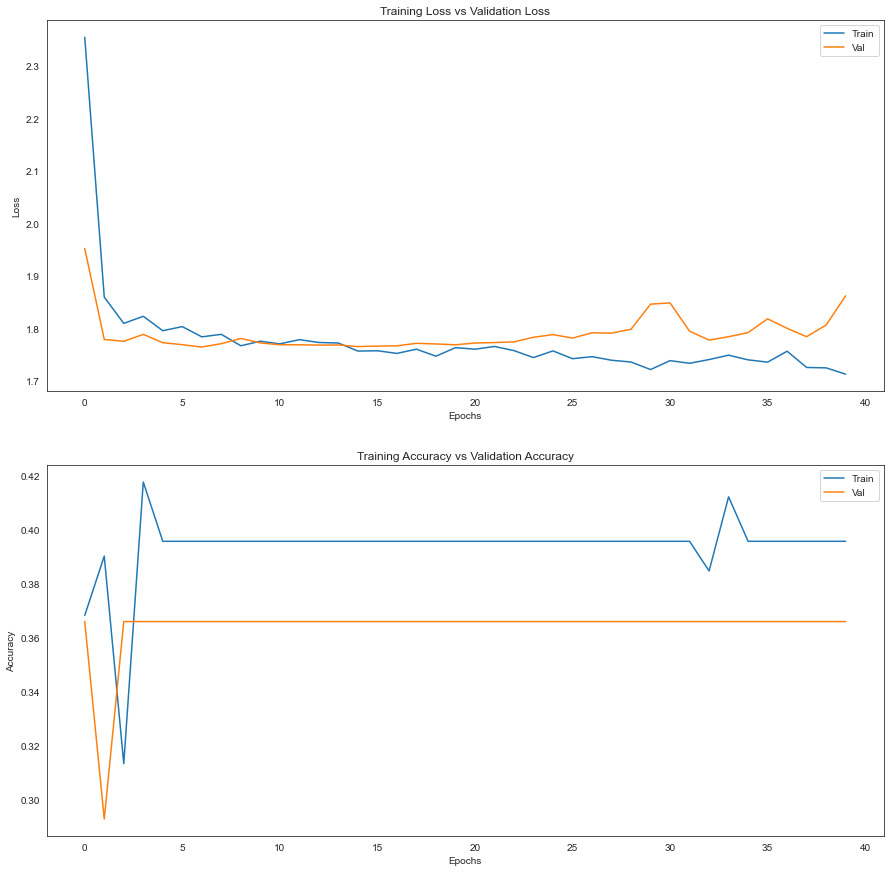

In [109]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))

axs[0].plot(H_model_Googlenet.history['loss'])
axs[0].plot(H_model_Googlenet.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend(['Train','Val'])

axs[1].plot(H_model_Googlenet.history['dense_38_accuracy'])
axs[1].plot(H_model_Googlenet.history['val_dense_38_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend(['Train', 'Val'])

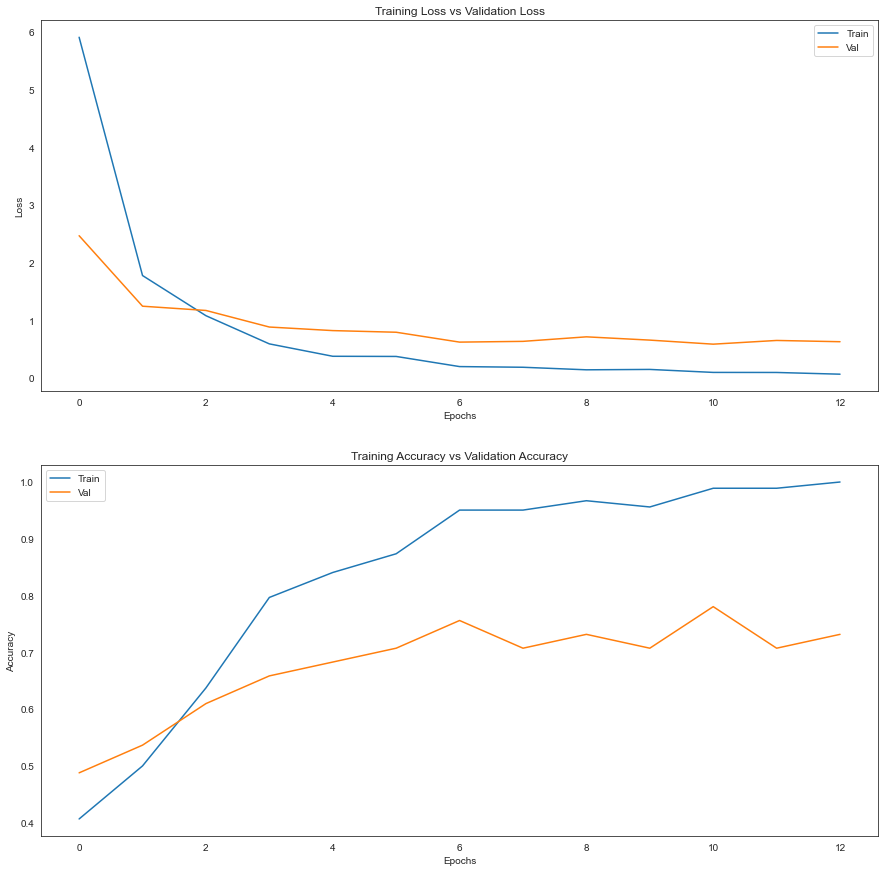

In [106]:
plot_loss_accur (H_model_inception2)

In [ ]:


def plot_loss_accur (history_model):

    fig, axs = plt.subplots(2, 1, figsize=(15,15))

    axs[0].plot(history_model.history['loss'])
    axs[0].plot(history_model.history['val_loss'])
    axs[0].title.set_text('Training Loss vs Validation Loss')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('Loss')
    axs[0].legend(['Train','Val'])

    axs[1].plot(history_model.history['dense_38_accuracy'])
    axs[1].plot(history_model.history['val_dense_38_accuracy'])
    axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('Accuracy')
    axs[1].legend(['Train', 'Val'])

In [ ]:

def plot_loss_accur (history_model):

    fig, axs = plt.subplots(2, 1, figsize=(15,15))

    axs[0].plot(history_model.history['loss'])
    axs[0].plot(history_model.history['val_loss'])
    axs[0].title.set_text('Training Loss vs Validation Loss')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('Loss')
    axs[0].legend(['Train','Val'])

    axs[1].plot(history_model.history['dense_38_accuracy'])
    axs[1].plot(history_model.history['val_dense_38_accuracy'])
    axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('Accuracy')
    axs[1].legend(['Train', 'Val'])

In [ ]:

def plot_loss_accur (history_model):

    fig, axs = plt.subplots(2, 1, figsize=(15,15))

    axs[0].plot(history_model.history['loss'])
    axs[0].plot(history_model.history['val_loss'])
    axs[0].title.set_text('Training Loss vs Validation Loss')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('Loss')
    axs[0].legend(['Train','Val'])

    axs[1].plot(history_model.history['dense_38_accuracy'])
    axs[1].plot(history_model.history['val_dense_38_accuracy'])
    axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('Accuracy')
    axs[1].legend(['Train', 'Val'])

# Salvar el modelo y los pesos

In [57]:
from keras.models import model_from_json
from time import localtime, strftime, gmtime

saving_directory = 'C:\\Users\\march\\Downloads\\CNN models'

# SAVE
# to serialize the modelo to JSON (model = trained and compiled model)
def save_model (model, name_model):
    ''' Function to save trained neuronal network with wheghts:
            INPUT: model and model name as string
            OUTPUT: after saving two files in the working directory it prints an success message. 
            '''

    time = strftime("%Y_%m_%d_%H:%M", localtime())
    model_name = name_model + time
    model_name_json = model_name + '.json'
    model_name_json = saving_directory + '\\' + model_name_json 
    model_name_h5 = model_name + '.h5'
    model_name_h5 = saving_directory + '\\' + model_name_h5

    model_json = model.to_json()
    with open(model_name_json, "w") as json_file:
        json_file.write(model_json)
    #to serialize the weights for HDF5
    model.save_weights(model_name_h5)
    print("Model saved. Date: ", time )


# LOAD / RECOVER
# to load the json file and load the model with weights

def load_model_and_weights(model_name):
    ''' Function to load saved models of neuronal network with wheghts (files should be in the working directori)
            INPUT: model name as string
            OUTPUT: return the model with the weights and print message if all is all right or something when wrong. 
            '''
    file_json = model_name+ '.json'
    file_h5 = model_name+ '.h5'
    try:
        json_file = open('model.json', 'r')
        loaded_model_json = json_file.read()
        json_file.close()
        loaded_model = model_from_json(loaded_model_json) # se cargan los pesos (weights) en el nuevo modelo
        loaded_model.load_weights("model.h5") # se cargan los pesos (weights) en el nuevo modelo
        print("Modelo cargado desde el PC") 
        return loaded_model
    except FileNotFoundError: 
        print (f'It was no possible to charge this model, please check the name and route of files: \n{model_name}.json \n{model_name}.h5')
    


In [25]:
load_model_and_weights('model_g')


It was no possible to charge this model, please check the name and route of files: 
model_g.json 
model_g.h5


In [ ]:

# se evalua el modelo cargado con los datos de los test
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

# Predicitons

To perform predictions testing images are also converted to the jpg format and resized properly

In [ ]:
# convert images from test directory to jpg
to_jpg_converter(test_images_dir)

In [56]:
from keras.applications.inception_v3 import decode_predictions 

In [ ]:
from keras.models import load_model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
import numpy as np
  
from keras.models import load_model
  
model = load_model('model_saved.h5')
  
image = load_img('v_data/test/planes/5.jpg', target_size=(224, 224))
img = np.array(image)
img = img / 255.0
img = img.reshape(1,224,224,3)
label = model.predict(img)
print("Predicted Class (0 - Cars , 1- Planes): ", label[0][0])

In [147]:
def confusion_matrix_predictions(test_labels, pred_labels):
    '''function to draw the confusion matrix:
            INPUT: 2 list of equal length
            OUTPUT: draw the confusion matrix if lenght have same length'''
    if len(test_labels) != len(pred_labels):
        print ('Length of lists should be the same, incorrect lists!')
    else: 
        class_names = set(test_labels + pred_labels)        
        CM = confusion_matrix(test_labels, pred_labels)
        ax = plt.axes()
        sns.heatmap(CM, annot=True, 
                annot_kws={"size": 10}, 
                xticklabels=class_names, 
                yticklabels=class_names, 
                cmap='viridis_r',
                ax = ax)
        ax.set_title('Confusion matrix')
        plt.show()

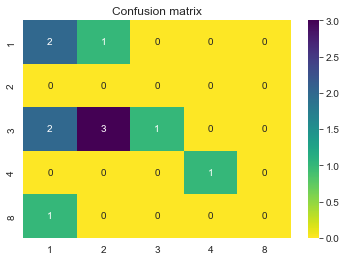

In [149]:
test_labels =[3,3,3,3,3,4,8,1,1,3,1] 
pred_labels =[2,2,1,3,2,4,1,2,1,1,1]
confusion_matrix_predictions(test_labels, pred_labels)
